In [ ]:
!pip install pandas-datareader

In [ ]:
import pandas_datareader as pdr
import datetime
import pandas as pd

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2024, 7, 20)

print(start)
print(end)

2018-01-01 00:00:00
2024-07-20 00:00:00


# **TESLA**

In [ ]:
stock = ['TSLA']
data = pdr.DataReader(stock,'stooq',str(start.date()),str(end.date())).stack('Symbols')
data.head()

,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2024-07-19,TSLA,239.20,249.44,236.8300,247.79,87403903
2024-07-18,TSLA,249.23,257.14,247.2000,251.09,110869037
2024-07-17,TSLA,248.50,258.47,246.1820,252.73,115584810
2024-07-16,TSLA,256.56,258.62,245.8001,255.31,126332470
2024-07-15,TSLA,252.64,265.60,251.7300,255.97,146912920


In [ ]:
newData = data.reset_index()
newData.head()

Attributes,Date,Symbols,Close,High,Low,Open,Volume
0,2024-07-19,TSLA,239.20,249.44,236.8300,247.79,87403903
1,2024-07-18,TSLA,249.23,257.14,247.2000,251.09,110869037
2,2024-07-17,TSLA,248.50,258.47,246.1820,252.73,115584810
3,2024-07-16,TSLA,256.56,258.62,245.8001,255.31,126332470
4,2024-07-15,TSLA,252.64,265.60,251.7300,255.97,146912920


In [ ]:
newData.to_csv('Tesla_stock_2018_to_2024.csv')

<Axes: title={'center': 'Tesla stock price'}, xlabel='Date', ylabel='Price'>

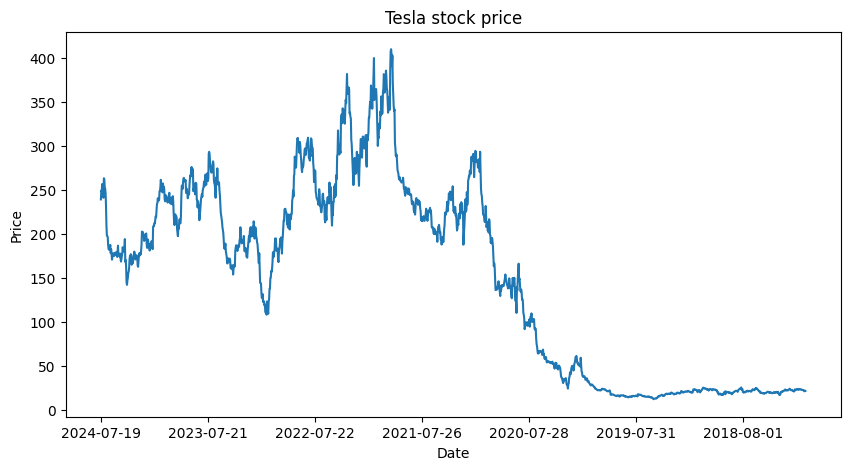

In [ ]:
import matplotlib.pyplot as plt
# plot the close price fo the tesla stock
# load the csv file
Tsla_data = pd.read_csv('/content/Tesla_stock_2018_to_2024.csv')

# set the date as the index
Tsla_data.set_index('Date',inplace=True)
Tsla_data.head()
# and then sperate the close price
close_price = Tsla_data['Close']

# then plot the close price
close_price.plot(xlabel='Date',ylabel='Price',label='Tsla',title='Tesla stock price', figsize=(10,5))



<Axes: title={'center': 'Tesla stock price'}, xlabel='Date', ylabel='Price'>

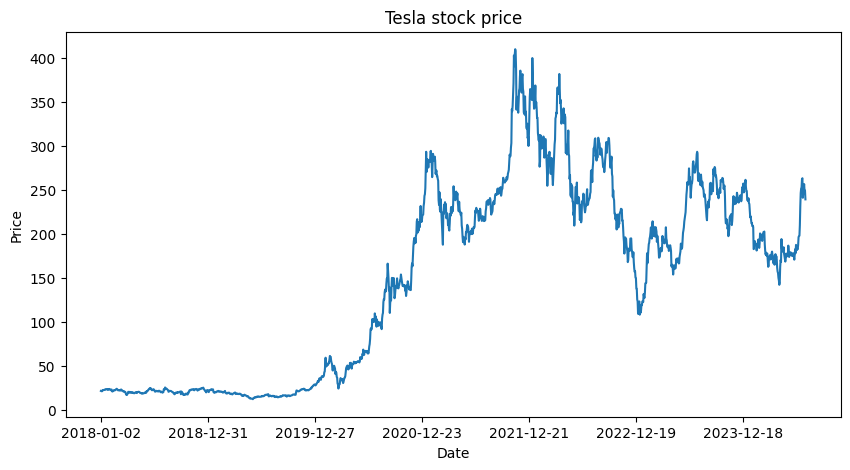

In [ ]:
# Ascending

import matplotlib.pyplot as plt
# plot the close price fo the tesla stock
# load the csv file
Tsla_data = pd.read_csv('/content/Tesla_stock_2018_to_2024.csv')

# set the date as the index
Tsla_data.set_index('Date',inplace=True)
# sort the data into ascending order wrt dates
Tsla_data.sort_index(ascending=True,inplace=True)

Tsla_data.head()
# and then sperate the close price
close_price = Tsla_data['Close']
# then plot the close price
close_price.plot(xlabel='Date',ylabel='Price',label='Tsla',title='Tesla stock price',figsize=(10,5))



<ipython-input-36-e68d2e200bab>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,2,1)


<Axes: title={'center': 'Tesla stock price'}, xlabel='Date', ylabel='Price'>

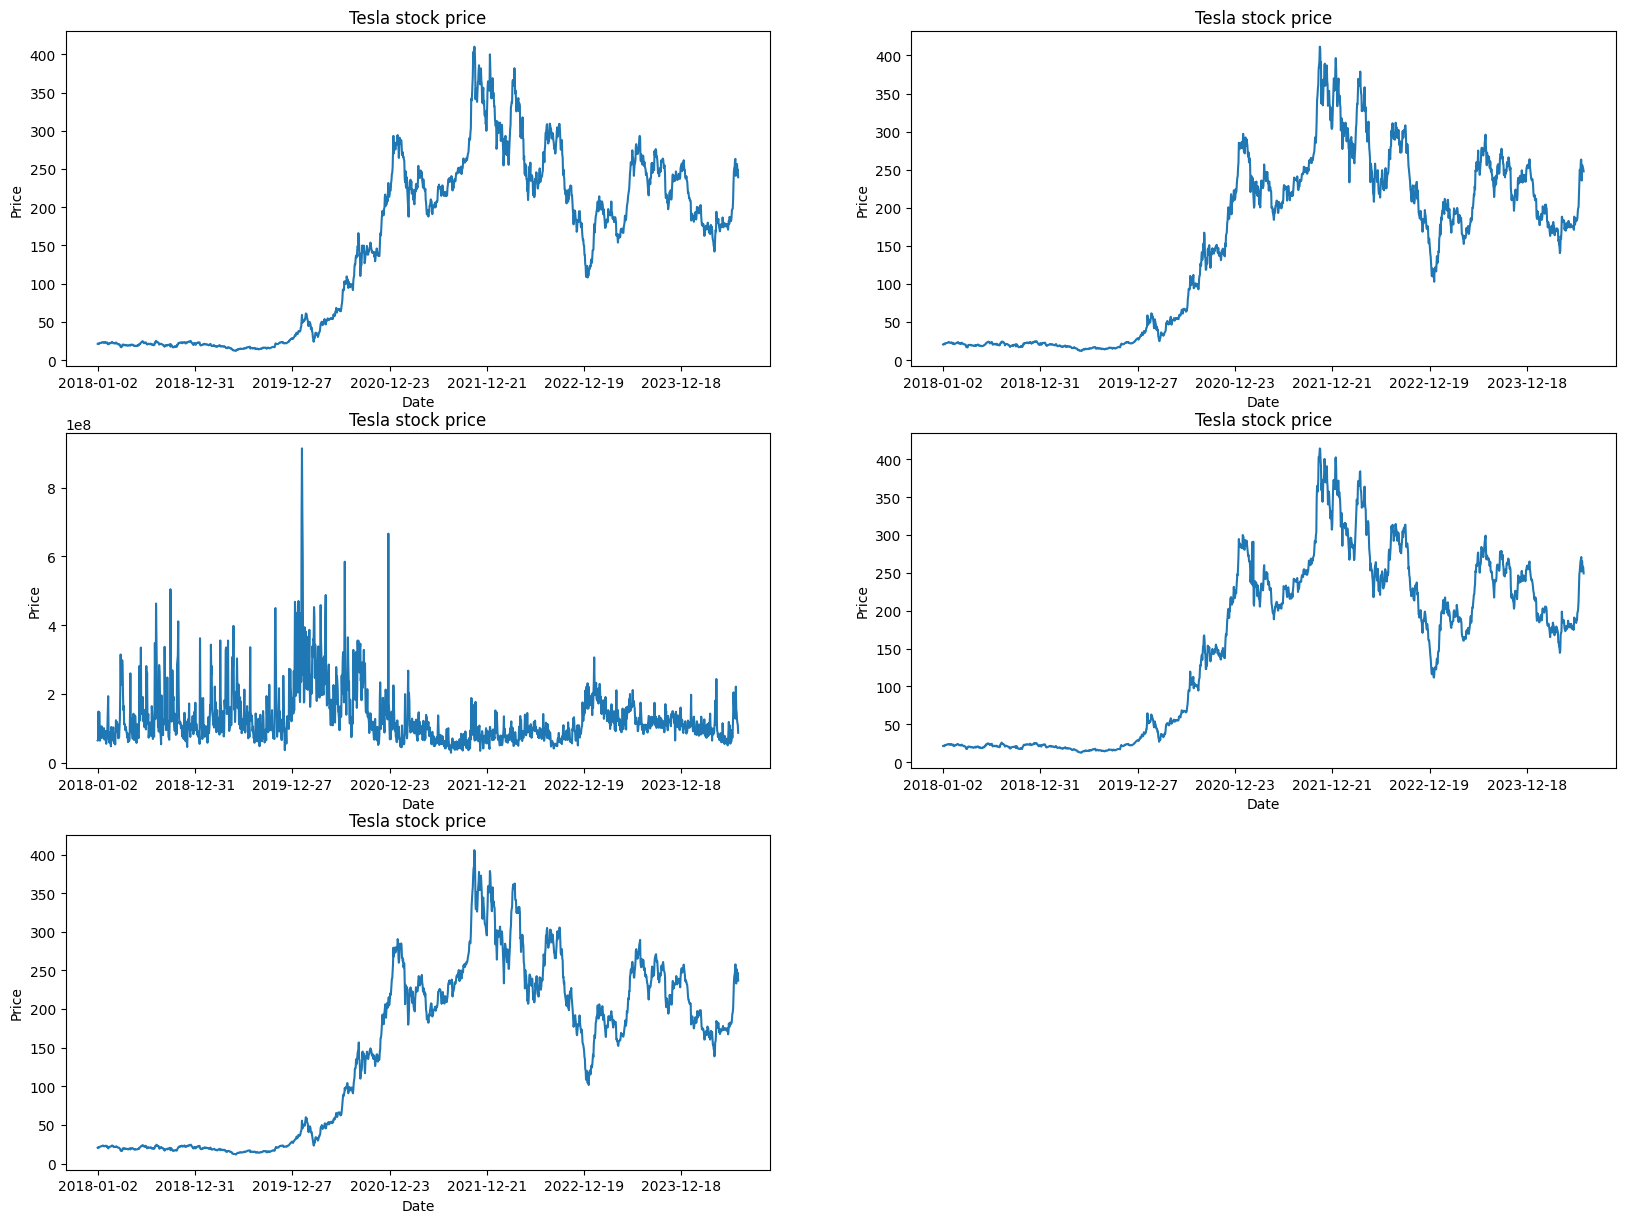

In [ ]:
plt.figure(1,(20,20))
plt.xticks(rotation=45)

plt.subplot(4,2,1)
close_price = Tsla_data['Close']
close_price.plot(xlabel='Date',ylabel='Price',label='Tsla',title='Tesla stock price')

plt.subplot(4,2,2)
open_price = Tsla_data['Open']
open_price.plot(xlabel='Date',ylabel='Price',label='Tsla',title='Tesla stock price')

plt.subplot(4,2,3)
volume = Tsla_data['Volume']
volume.plot(xlabel='Date',ylabel='Price',label='Tsla',title='Tesla stock price')

plt.subplot(4,2,4)
high_price = Tsla_data['High']
high_price.plot(xlabel='Date',ylabel='Price',label='Tsla',title='Tesla stock price')

plt.subplot(4,2,5)
low_price = Tsla_data['Low']
low_price.plot(xlabel='Date',ylabel='Price',label='Tsla',title='Tesla stock price')



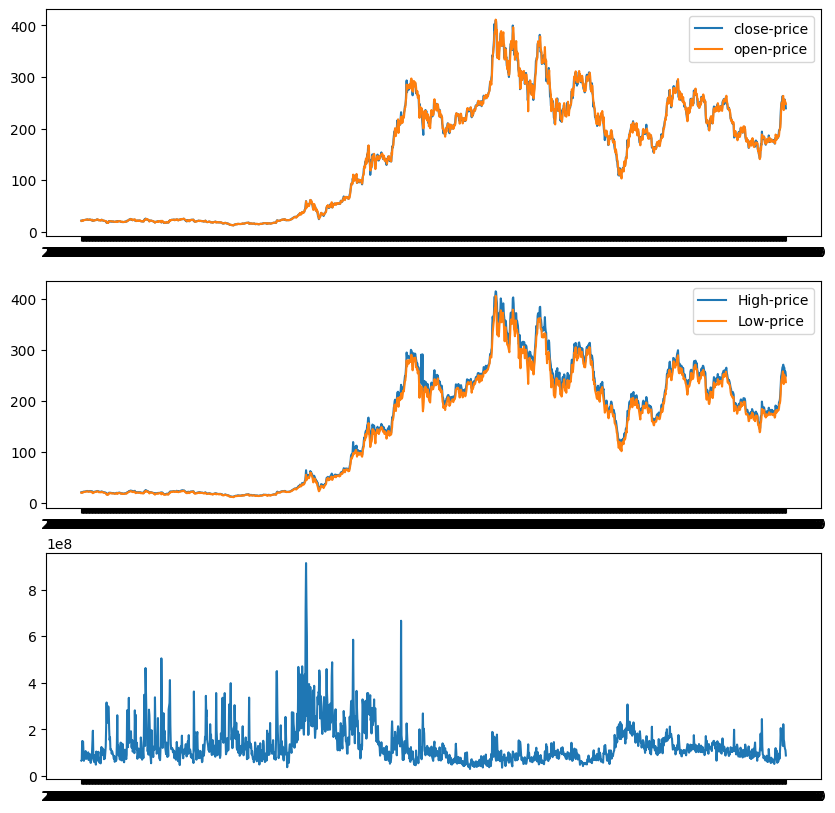

In [ ]:
plt.figure(2,(10,10))
plt.subplot(3,1,1)
plt.plot(Tsla_data['Close'],label='close-price')
plt.plot(Tsla_data['Open'],label='open-price')
plt.legend()

plt.subplot(3,1,2)
plt.plot(Tsla_data['High'],label='High-price')
plt.plot(Tsla_data['Low'],label='Low-price')
plt.legend()
plt.subplot(3,1,3)
plt.plot(Tsla_data['Volume'],label='Volumne')



In [ ]:
# moving average

Tsla_data.head()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2018-01-02,1646,TSLA,21.3687,21.4740,20.7333,20.8000,65188275
2018-01-03,1645,TSLA,21.1500,21.6833,21.0367,21.4000,66893295
2018-01-04,1644,TSLA,20.9747,21.2367,20.3787,20.8580,149194260
2018-01-05,1643,TSLA,21.1053,21.1493,20.8000,21.1080,68838660
2018-01-08,1642,TSLA,22.4273,22.4680,21.0333,21.0667,147555480


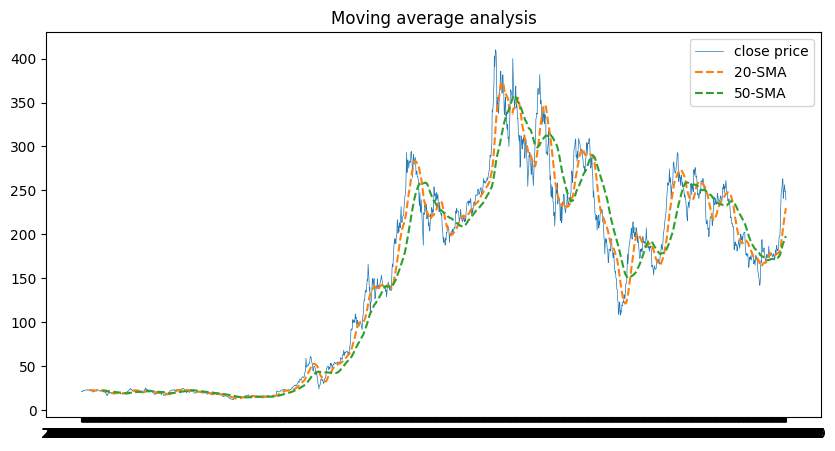

In [ ]:
# calulate the simple moving average (SMA)
Tsla_data['SMA_20'] = Tsla_data['Close'].rolling(window = 20).mean()
Tsla_data['SMA_50'] = Tsla_data['Close'].rolling(window = 50).mean()

plt.figure(1,(10,5))

plt.plot(Tsla_data['Close'],label='close price',linewidth=0.5)
plt.plot(Tsla_data['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(Tsla_data['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()

In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=c674ca4fbc22a402d15a637624e738bc12aa12966abc0d7b058bce568027401e
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


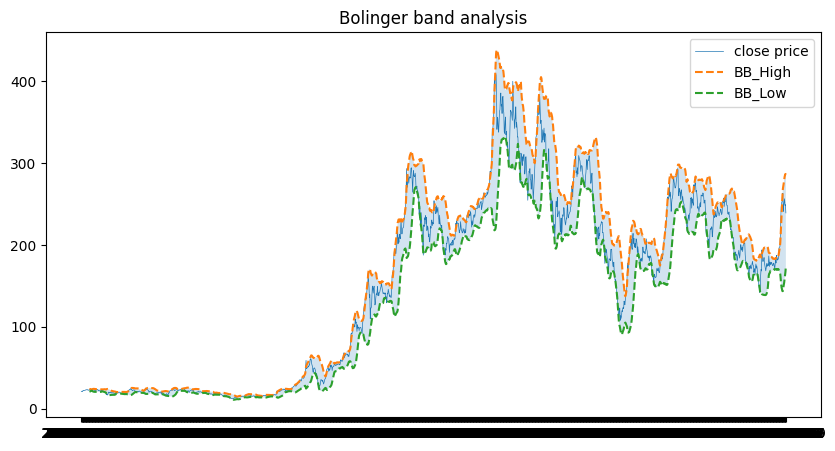

In [ ]:
import ta
# bollinger band
bb = ta.volatility.BollingerBands(Tsla_data['Close'],window=20,window_dev=2)

Tsla_data['BB_High']=bb.bollinger_hband()
Tsla_data['BB_Low']=bb.bollinger_lband()
plt.figure(1,(10,5))
plt.plot(Tsla_data['Close'],label='close price',linewidth=0.5)
plt.plot(Tsla_data['BB_High'],label='BB_High',linestyle='--')
plt.plot(Tsla_data['BB_Low'],label='BB_Low',linestyle='--')

plt.fill_between(Tsla_data.index,Tsla_data['BB_High'],Tsla_data['BB_Low'],alpha=0.2)

plt.title('Bolinger band analysis')
plt.legend()



,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,BB_High,BB_Low,RSI
Date,,,,,,,,,,,,
2024-07-15,4,TSLA,252.64,265.60,251.7300,255.97,146912920,216.7975,192.8150,279.557930,154.037070,70.754312
2024-07-16,3,TSLA,256.56,258.62,245.8001,255.31,126332470,220.7250,194.3460,283.114805,158.335195,72.021860
2024-07-17,2,TSLA,248.50,258.47,246.1820,252.73,115584810,223.7780,195.6922,285.324052,162.231948,65.715167
2024-07-18,1,TSLA,249.23,257.14,247.2000,251.09,110869037,226.9965,196.9816,286.772082,167.220918,66.005515
2024-07-19,0,TSLA,239.20,249.44,236.8300,247.79,87403903,229.8780,198.2094,286.065007,173.690993,58.655507


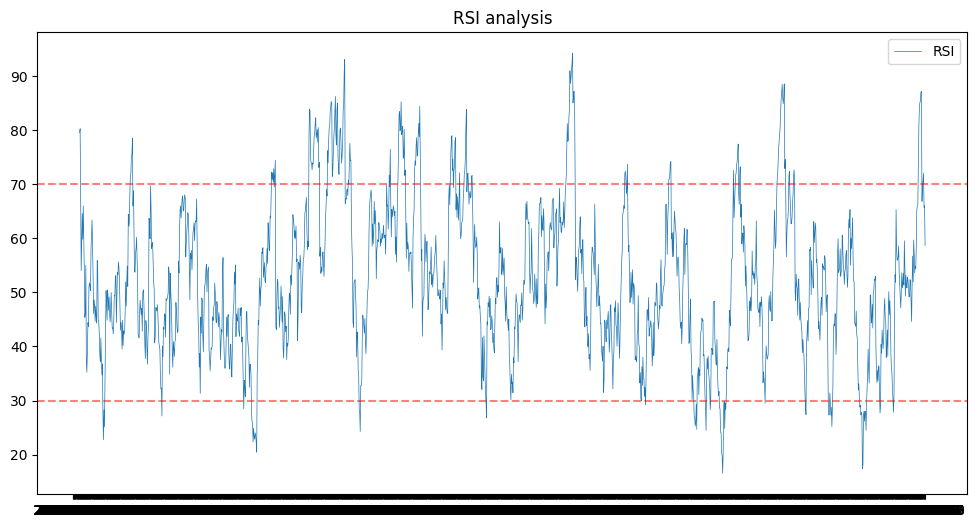

In [ ]:
# relative strength index
Tsla_data['RSI'] = ta.momentum.rsi(Tsla_data['Close'],window=14)

plt.figure(1,(12,6))
plt.plot(Tsla_data['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5) #alpha means the transparency
plt.axhline(30,linestyle='--',color='red',alpha=0.5) #axhline= x-axis horizontal line
plt.title('RSI analysis')
plt.legend()
Tsla_data.tail()

In [ ]:
Tsla_data.to_csv('New_Tsla_Data.csv')

# **ICICI BANK (IBN)**

In [ ]:
stock1 = ['IBN']
data1 = pdr.DataReader(stock1,'stooq',str(start.date()),str(end.date())).stack('Symbols')
data1.head()

,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2024-07-19,IBN,29.35,29.61,29.345,29.36,4027158.0
2024-07-18,IBN,29.46,29.55,29.400,29.41,5150982.0
2024-07-17,IBN,29.30,29.54,29.250,29.51,3872244.0
2024-07-16,IBN,29.62,29.66,29.300,29.34,7632457.0
2024-07-15,IBN,29.17,29.25,29.120,29.25,4898086.0


In [ ]:
newData1 = data1.reset_index()
newData1.head()

Attributes,Date,Symbols,Close,High,Low,Open,Volume
0,2024-07-19,IBN,29.35,29.61,29.345,29.36,4027158.0
1,2024-07-18,IBN,29.46,29.55,29.400,29.41,5150982.0
2,2024-07-17,IBN,29.30,29.54,29.250,29.51,3872244.0
3,2024-07-16,IBN,29.62,29.66,29.300,29.34,7632457.0
4,2024-07-15,IBN,29.17,29.25,29.120,29.25,4898086.0


In [ ]:
newData1.to_csv('IBN_stock_2018_to_2024.csv')

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2018-01-02,1646,IBN,9.67081,9.68075,9.50469,9.58228,6.635720e+06
2018-01-03,1645,IBN,9.65091,9.70065,9.63201,9.68075,6.277079e+06
2018-01-04,1644,IBN,9.62207,9.71060,9.60217,9.67081,5.625544e+06
2018-01-05,1643,IBN,9.64196,9.65091,9.50469,9.62207,1.010170e+07
2018-01-08,1642,IBN,9.65091,9.66086,9.57332,9.65091,5.311405e+06


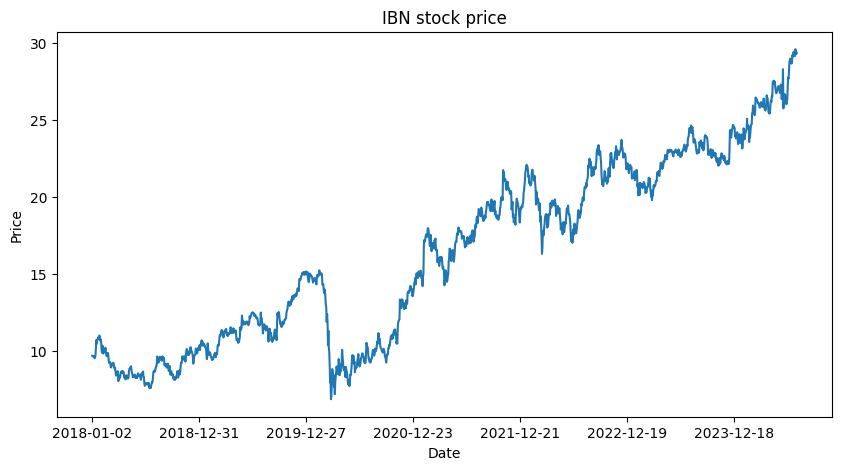

In [ ]:
IBN_data = pd.read_csv('/content/IBN_stock_2018_to_2024.csv')

IBN_data.set_index('Date',inplace=True)
IBN_data.sort_index(ascending=True,inplace=True)

close_price = IBN_data['Close']

close_price.plot(xlabel='Date',ylabel='Price',label='IBN',title='IBN stock price',figsize=(10,5))
IBN_data.head()

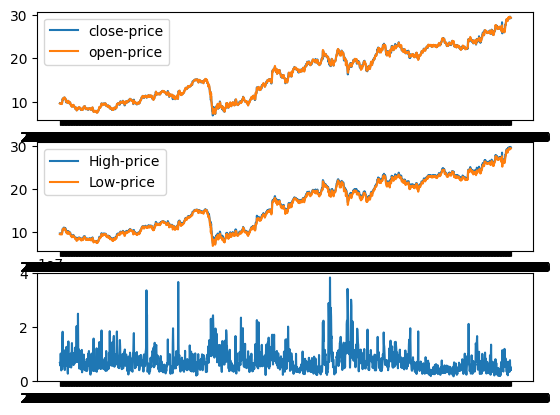

In [ ]:
plt.figure(1)
plt.subplot(3,1,1)
plt.plot(IBN_data['Close'],label='close-price')
plt.plot(IBN_data['Open'],label='open-price')
plt.legend()

plt.subplot(3,1,2)
plt.plot(IBN_data['High'],label='High-price')
plt.plot(IBN_data['Low'],label='Low-price')
plt.legend()
plt.subplot(3,1,3)
plt.plot(IBN_data['Volume'],label='Volumne')

In [ ]:
IBN_data.head()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2018-01-02,1646,IBN,9.67081,9.68075,9.50469,9.58228,6.635720e+06
2018-01-03,1645,IBN,9.65091,9.70065,9.63201,9.68075,6.277079e+06
2018-01-04,1644,IBN,9.62207,9.71060,9.60217,9.67081,5.625544e+06
2018-01-05,1643,IBN,9.64196,9.65091,9.50469,9.62207,1.010170e+07
2018-01-08,1642,IBN,9.65091,9.66086,9.57332,9.65091,5.311405e+06


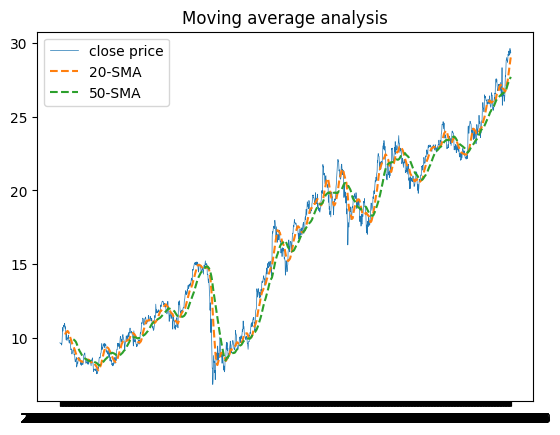

In [ ]:
# SIMPLE MOVING AVERAGE

IBN_data['SMA_20'] = IBN_data['Close'].rolling(window = 20).mean()
IBN_data['SMA_50'] = IBN_data['Close'].rolling(window = 50).mean()

plt.figure(1)

plt.plot(IBN_data['Close'],label='close price',linewidth=0.5)
plt.plot(IBN_data['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(IBN_data['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()

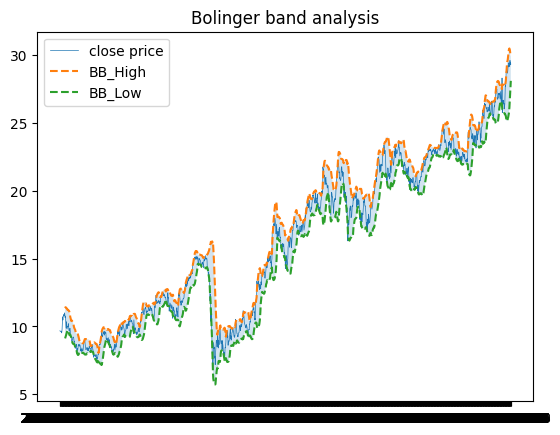

In [ ]:
bb1 = ta.volatility.BollingerBands(IBN_data['Close'],window=20,window_dev=2)

IBN_data['BB_High']=bb1.bollinger_hband()
IBN_data['BB_Low']=bb1.bollinger_lband()

plt.figure(1)
plt.plot(IBN_data['Close'],label='close price',linewidth=0.5)
plt.plot(IBN_data['BB_High'],label='BB_High',linestyle='--')
plt.plot(IBN_data['BB_Low'],label='BB_Low',linestyle='--')

plt.fill_between(IBN_data.index,IBN_data['BB_High'],IBN_data['BB_Low'],alpha=0.2)

plt.title('Bolinger band analysis')
plt.legend()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,BB_High,BB_Low,RSI
Date,,,,,,,,,,,,
2024-07-15,4,TSLA,252.64,265.60,251.7300,255.97,146912920,216.7975,192.8150,279.557930,154.037070,70.754312
2024-07-16,3,TSLA,256.56,258.62,245.8001,255.31,126332470,220.7250,194.3460,283.114805,158.335195,72.021860
2024-07-17,2,TSLA,248.50,258.47,246.1820,252.73,115584810,223.7780,195.6922,285.324052,162.231948,65.715167
2024-07-18,1,TSLA,249.23,257.14,247.2000,251.09,110869037,226.9965,196.9816,286.772082,167.220918,66.005515
2024-07-19,0,TSLA,239.20,249.44,236.8300,247.79,87403903,229.8780,198.2094,286.065007,173.690993,58.655507


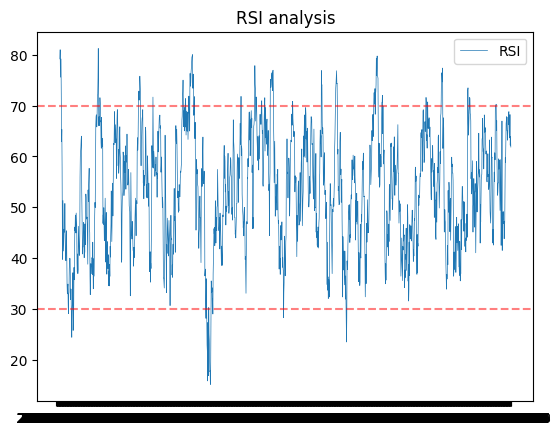

In [ ]:
#Relative Strength Index
IBN_data['RSI'] = ta.momentum.rsi(IBN_data['Close'],window=14)

plt.figure(1)
plt.plot(IBN_data['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend()
IBN_data.tail()